<a href="https://colab.research.google.com/github/sachinpatkar/stocktrend/blob/main/smiley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Stock Data Analysis with Moving Averages

#This notebook fetches historical stock data from Yahoo Finance, calculates the 21-day and 50-day moving averages, and plots these along with the stock's closing price. You can modify the stock symbol and date range as needed.


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
## Function Definitions

#- `calculate_moving_averages`: Calculates the moving averages for specified periods.
#- `is_ma_upward`: Checks if the moving average is trending upwards.
#- `plot_stock_data`: Plots the stock data with moving averages.
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_moving_averages(data, ma_periods):
    for period in ma_periods:
        data[f"MA{period}"] = data['Close'].rolling(window=period).mean()
    return data

def is_ma_upward(data, period):
    ma_column = f"MA{period}"
    return data[ma_column][-2] < data[ma_column][-1]

def is_above_ma(data, ma_period):
    """
    Check if the current stock price is above the specified moving average.

    :param data: DataFrame with stock data.
    :param ma_period: Period of the moving average to check.
    :return: Boolean indicating if the stock price is above the specified MA.
    """
    ma_column = f"MA{ma_period}"
    return data['Close'].iloc[-1] > data[ma_column].iloc[-1]

# Update the plot function to include a smiley face when conditions are met

# Update the plot function to include a smiley face when the trend starts

def plot_stock_data_with_smiley(data, symbol):
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['MA21'], label='21-day MA', color='green')
    plt.plot(data['MA50'], label='50-day MA', color='red')
    plt.plot(data['MA200'], label='200-day MA', color='orange')

    # Identify the start of the trend
    for i in range(1, len(data)):
        if data['Close'][i] > data['MA200'][i] and \
           data['MA21'][i-1] < data['MA21'][i] and data['MA50'][i-1] < data['MA50'][i]:
            # Mark the start of the trend with a smiley face
            plt.scatter(data.index[i], data['Close'][i], marker='o', color='yellow', s=100)
            plt.text(data.index[i], data['Close'][i], '😊', fontsize=12, ha='center')
            break  # Only mark the first occurrence

    plt.title(f"{symbol} Stock Price with Moving Averages")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed
Is hood above its 200-day Moving Average? Yes


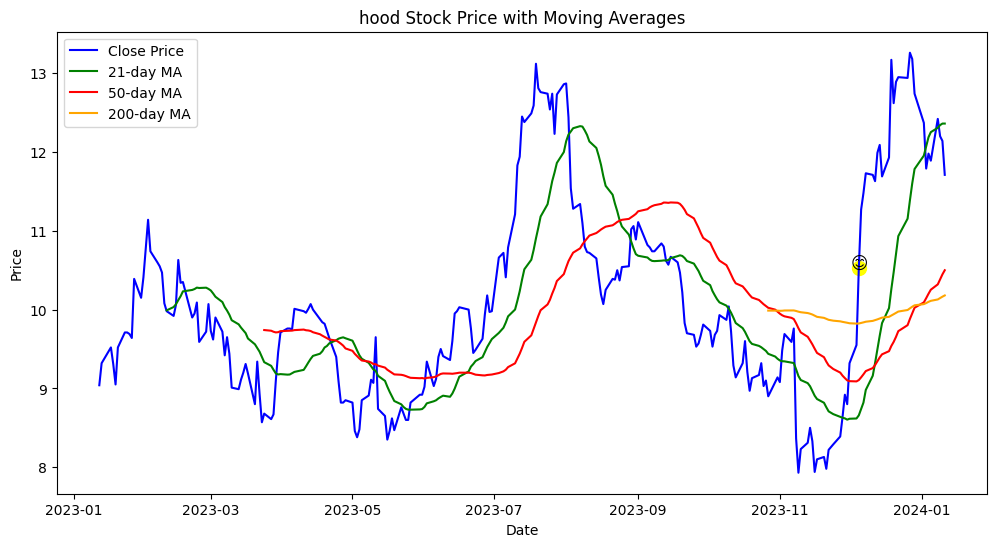

In [4]:
# Update this cell to include the 200-day MA in the analysis

# Set the stock symbol and date range
symbol = 'hood'  # Example: 'AAPL', 'MSFT', etc.
start_date = '2023-01-12'
end_date = '2024-01-12'

# Fetch data and calculate MAs including the 200-day MA
data = fetch_stock_data(symbol, start_date, end_date)
data = calculate_moving_averages(data, [21, 50, 200])


# Check if the stock is above the 200-day MA
above_ma200 = is_above_ma(data, 200)
print(f"Is {symbol} above its 200-day Moving Average? {'Yes' if above_ma200 else 'No'}")

# Plot the data
plot_stock_data_with_smiley(data, symbol)
